In [10]:
import yfinance as yf #yahoo finance API
import matplotlib.pyplot as plt 
import pandas as pd 

sp500=yf.Ticker('^GSPC') #S&P 500 index ticker

sp500=sp500.history(period='max') #get historical data for S&P 500

sp500



,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1927-12-30 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
1928-01-03 00:00:00-05:00,17.760000,17.760000,17.760000,17.760000,0,0.0,0.0
1928-01-04 00:00:00-05:00,17.719999,17.719999,17.719999,17.719999,0,0.0,0.0
1928-01-05 00:00:00-05:00,17.549999,17.549999,17.549999,17.549999,0,0.0,0.0
1928-01-06 00:00:00-05:00,17.660000,17.660000,17.660000,17.660000,0,0.0,0.0
...,...,...,...,...,...,...,...
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,0.0,0.0
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,0.0,0.0
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,0.0,0.0


<Axes: xlabel='Date'>

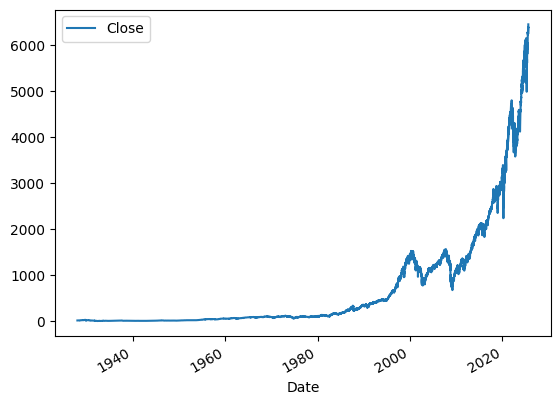

In [11]:
sp500.plot.line(y='Close', use_index=True)

In [12]:
# clean data

sp500 = sp500.drop(columns=['Dividends', 'Stock Splits']) # unnecessary columns

# create new columns for tomorrow's close and target variable
sp500['Tomorrow'] = sp500['Close'].shift(-1)
sp500['Target'] = (sp500['Tomorrow'] > sp500['Close']).astype(int)

sp500 = sp500.loc["1990-01-01":]  # filter data to start from 1990
sp500

,Open,High,Low,Close,Volume,Tomorrow,Target
Date,,,,,,,
1990-01-02 00:00:00-05:00,353.399994,359.690002,351.980011,359.690002,162070000,358.760010,0
1990-01-03 00:00:00-05:00,359.690002,360.589996,357.890015,358.760010,192330000,355.670013,0
1990-01-04 00:00:00-05:00,358.760010,358.760010,352.890015,355.670013,177000000,352.200012,0
1990-01-05 00:00:00-05:00,355.670013,355.670013,351.350006,352.200012,158530000,353.790009,1
1990-01-08 00:00:00-05:00,352.200012,354.239990,350.540009,353.790009,140110000,349.619995,0
...,...,...,...,...,...,...,...
2025-08-06 00:00:00-04:00,6309.299805,6352.830078,6301.109863,6345.060059,5408560000,6340.000000,0
2025-08-07 00:00:00-04:00,6374.319824,6389.709961,6310.319824,6340.000000,5306090000,6389.450195,1
2025-08-08 00:00:00-04:00,6355.220215,6395.160156,6355.220215,6389.450195,4769910000,6373.450195,0


In [16]:
sp500.to_csv('sp500_data.csv')  # save to CSV file